In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [353]:
data = pd.read_excel("data.xlsx")

data

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [354]:
id_of_months = data["client_id"].isnull()

months = data[id_of_months].status

months

0           Май 2021
129        Июнь 2021
258        Июль 2021
369      Август 2021
484    Сентябрь 2021
594     Октябрь 2021
Name: status, dtype: object

In [355]:
july_ind = months.index[months == "Июль 2021"].tolist()[0]

july_ind

258

In [356]:
ind_in_months = months.index.get_loc(july_ind)

ind_in_months

2

In [357]:
indices_between_july_and_another_month = months.index[ind_in_months: ind_in_months + 2]

indices_between_july_and_another_month

Int64Index([258, 369], dtype='int64')

In [358]:
try:
    july = data[indices_between_july_and_another_month[0] + 1: indices_between_july_and_another_month[1]]
except IndexError:
    july = data[indices_between_july_and_another_month[0] + 1: ]

july

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-08-09 00:00:00
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-08-09 00:00:00
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,NaN,НЕТ,NaN
262,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-09-17 00:00:00
263,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-08-19 00:00:00
...,...,...,...,...,...,...,...,...
364,277.0,4878.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-08-03 00:00:00
365,281.0,11703.7,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-08-13 00:00:00
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,NaN,НЕТ,NaN
367,286.0,4048.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-08-11 00:00:00


In [359]:
# Общая выручка за июль 2021:

revenue_for_july = july[july.status != "ПРОСРОЧЕНО"]["sum"].sum()

revenue_for_july

859896.4699999997

In [360]:
id_of_months = data["client_id"].isnull()

months = data[id_of_months].status

for month in months:
    print(month)

Май 2021
Июнь 2021
Июль 2021
Август 2021
Сентябрь 2021
Октябрь 2021


In [361]:
def data_for_month(month_ind):
    ind_in_months = months.index.get_loc(month_ind)

    indices_between_cur_month_and_next_month = months.index[ind_in_months: ind_in_months + 2]

    try:
        month = data[indices_between_cur_month_and_next_month[0] + 1: indices_between_cur_month_and_next_month[1]]
    except IndexError:
        month = data[indices_between_cur_month_and_next_month[0] + 1: ]
    
    return month

In [362]:
def get_ind_of_month(month):
    return months.index[months == month].tolist()[0]

In [363]:
months_and_revenues = dict()

for month in months:
    print("month =", month)
    month_ind = get_ind_of_month(month)
    months_and_revenues[month] = data_for_month(month_ind)["sum"].sum()
    print("month_ind =", month_ind)
    print()

month = Май 2021
month_ind = 0

month = Июнь 2021
month_ind = 129

month = Июль 2021
month_ind = 258

month = Август 2021
month_ind = 369

month = Сентябрь 2021
month_ind = 484

month = Октябрь 2021
month_ind = 594



In [364]:
months_and_revenues

{'Май 2021': 809572.19,
 'Июнь 2021': 810266.1099999999,
 'Июль 2021': 861874.1699999997,
 'Август 2021': 850435.7899999998,
 'Сентябрь 2021': 820383.7799999997,
 'Октябрь 2021': 1033148.3899999999}

<BarContainer object of 6 artists>

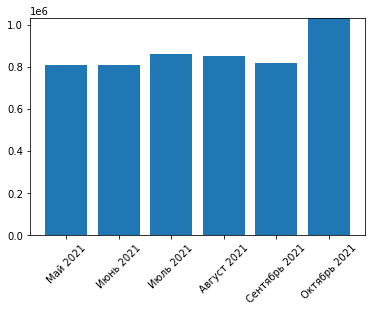

In [365]:
plt.xticks(rotation=45)
plt.ylim(0, max(months_and_revenues.values()))
plt.bar(months_and_revenues.keys(), months_and_revenues.values())

In [366]:
def find_month(month):
    gen = (candidate_month for candidate_month in months if month in candidate_month.lower())
    month_ind = get_ind_of_month(next(gen))
    return data_for_month(month_ind)

In [367]:
september = find_month("сентябрь 2021")

september

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
485,15.0,14288.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-10-08 00:00:00
486,16.0,1494.0,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-10-08 00:00:00
487,21.0,893.7,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-10-20 00:00:00
488,24.0,18142.7,ОПЛАЧЕНО,Андреев,текущая,NaN,NaN,2021-10-15 00:00:00
489,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
589,304.0,1313.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-10-13 00:00:00
590,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-10-05 00:00:00
591,285.0,4328.7,ОПЛАЧЕНО,Васильев,новая,NaN,оригинал,2021-10-05 00:00:00
592,286.0,4078.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-10-20 00:00:00


In [368]:
revenue_from_managers = september.groupby("sale")["sum"].sum()

revenue_from_managers

sale
Андреев       133652.50
Васильев       49895.45
Иванов         94770.60
Кузнецова      72228.40
Михайлов        4268.70
Петрова       149344.46
Смирнов       221525.70
Соколов        35183.50
Филимонова     59514.47
Name: sum, dtype: float64

In [369]:
# Менеджер, привлёкший для компании больше всего денежных средств в сентябре 2021:

revenue_from_managers.idxmax(), revenue_from_managers.max()

('Смирнов', 221525.7)

In [370]:
october = find_month("октябрь 2021")

october

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
595,15.0,14591.7,В РАБОТЕ,Иванов,текущая,NaN,оригинал,2021-11-11 00:00:00
596,16.0,1291.7,В РАБОТЕ,Иванов,текущая,NaN,оригинал,2021-11-11 00:00:00
597,379.0,6063.7,В РАБОТЕ,Иванов,новая,NaN,оригинал,2021-11-11 00:00:00
598,24.0,18592.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-11-12 00:00:00
599,24.0,1453.7,ОПЛАЧЕНО,Андреев,текущая,NaN,оригинал,2021-11-12 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [371]:
# Тип сделок (новая/текущая), который был преобладающим в октябре 2021:

october["new/current"].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

In [372]:
may = find_month("май 2021")

may

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07 00:00:00
...,...,...,...,...,...,...,...,...
124,277.0,4623.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-07-14 00:00:00
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,NaN,оригинал,2021-07-16 00:00:00
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,NaN,оригинал,2021-07-27 00:00:00
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-05-31 00:00:00


In [373]:
may[(may["document"] == "оригинал") & ("-06-" in may["receiving_date"])]

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date


In [374]:
# Количество оригиналов договора по майским сделкам получено в июне 2021:

received_in_june = pd.to_datetime(may["receiving_date"], errors='coerce').dt.month == 6

may[(may["document"] == "оригинал") & (received_in_june)].shape[0]

76

In [375]:
# We immediately work with what managers should get.

data.loc[data["new/current"] == "новая", "sum"] *= 0.07
data.loc[(data["new/current"] == "текущая") & (data["sum"] <= 10000), "sum"] *= 0.03
data.loc[(data["new/current"] == "текущая") & (data["sum"] > 10000), "sum"] *= 0.05

In [376]:
data

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.700,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,381.689,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,699.585,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,21.591,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,129.861,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,216.734,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,216.734,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,308.259,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [377]:
def new_deals(what_months, not_later=0):
    data_for_all_months = [find_month(month) for month in what_months]
    all_months = pd.concat(data_for_all_months, ignore_index=True)
    
    if not_later:
        up_to_month = pd.to_datetime(all_months["receiving_date"], errors='coerce').dt.month <= not_later
    
        return all_months[
            (all_months.status == "ОПЛАЧЕНО") & 
            (all_months["new/current"] == "новая") &
            (all_months.document == "оригинал") & 
            (up_to_month)
        ]
    
    return all_months[
        (all_months.status == "ОПЛАЧЕНО") & 
        (all_months["new/current"] == "новая") &
        (all_months.document == "оригинал")
    ]

In [378]:
def current_deals(what_months, not_later=0):
    data_for_all_months = [find_month(month) for month in what_months]
    all_months = pd.concat(data_for_all_months, ignore_index=True)
    
    if not_later:
        up_to_month = pd.to_datetime(all_months["receiving_date"], errors='coerce').dt.month <= not_later
    
        return all_months[
            (all_months.status != "ПРОСРОЧЕНО") & 
            (all_months["new/current"] == "текущая") &
            (all_months.document == "оригинал") & 
            (up_to_month)
        ]
    
    return all_months[
            (all_months.status != "ПРОСРОЧЕНО") & 
            (all_months["new/current"] == "текущая") &
            (all_months.document == "оригинал")
        ]

In [379]:
how_much_managers_should_get = new_deals(["май 2021", "июнь 2021"]).groupby("sale")["sum"].sum()

how_much_managers_should_get = how_much_managers_should_get.add(
    current_deals(["май 2021", "июнь 2021"]).groupby("sale")["sum"].sum(), fill_value=0
)

how_much_managers_should_get

sale
Андреев        8744.0334
Васильев       1376.2800
Иванов         8495.2910
Кузнецова      7101.6217
Петрова       17799.5494
Селиванов      5651.0120
Смирнов       10508.9890
Соколов         269.2110
Филимонова     2727.6409
Name: sum, dtype: float64

In [380]:
new = new_deals(["май 2021", "июнь 2021"], 6).groupby("sale")["sum"].sum()

new

sale
Андреев      1144.3390
Васильев       35.2590
Кузнецова     424.1321
Петрова       770.2590
Name: sum, dtype: float64

In [381]:
current = current_deals(["май 2021", "июнь 2021"], 6).groupby("sale")["sum"].sum()

current

sale
Андреев       3653.8647
Васильев       303.9720
Иванов        2503.8390
Кузнецова     2180.5395
Петрова       6258.5430
Селиванов      353.3220
Смирнов       4078.7240
Филимонова     409.6830
Name: sum, dtype: float64

In [382]:
new_plus_current = new.add(current, fill_value=0)

new_plus_current

sale
Андреев       4798.2037
Васильев       339.2310
Иванов        2503.8390
Кузнецова     2604.6716
Петрова       7028.8020
Селиванов      353.3220
Смирнов       4078.7240
Филимонова     409.6830
Name: sum, dtype: float64

In [383]:
# Остаток каждого из менеджеров на 01.07.2021:

balance_for_first_of_july = how_much_managers_should_get.sub(new_plus_current, fill_value=0)

balance_for_first_of_july

sale
Андреев        3945.8297
Васильев       1037.0490
Иванов         5991.4520
Кузнецова      4496.9501
Петрова       10770.7474
Селиванов      5297.6900
Смирнов        6430.2650
Соколов         269.2110
Филимонова     2317.9579
Name: sum, dtype: float64